In [181]:
import os
import numpy as np
import pickle
import torch
import pandas as pd

from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from tqdm import tqdm

In [182]:
sonar_samples = pd.read_table('../Data/sonar_samples', sep = " ", header=None)

sonar_samples.head()

,0,1,2,3
0,1.4216,1.2448,1.7510,-22.0
1,1.4218,1.2450,1.7511,-22.0
2,1.4215,1.2448,1.7509,-22.0
3,1.4215,1.2448,1.7509,-22.0
4,1.4158,1.2402,1.7468,-22.0


In [183]:
X_sonar = torch.Tensor(sonar_samples.iloc[:, :-1].to_numpy())
print(X_sonar)
Y_sonar = torch.Tensor(sonar_samples.iloc[:, -1:].to_numpy())
print(Y_sonar)

tensor([[1.4216, 1.2448, 1.7510],
        [1.4218, 1.2450, 1.7511],
        [1.4215, 1.2448, 1.7509],
        ...,
        [2.0632, 1.1318, 1.0445],
        [2.0632, 1.1318, 1.0445],
        [1.9847, 1.6233, 1.4057]])
tensor([[-22.],
        [-22.],
        [-22.],
        ...,
        [  0.],
        [  0.],
        [  0.]])


In [184]:
Y_sonar

tensor([[-22.],
        [-22.],
        [-22.],
        ...,
        [  0.],
        [  0.],
        [  0.]])

In [185]:
loader = DataLoader(list(zip(X_sonar, Y_sonar)), shuffle = True, batch_size = 20)

for x, y in loader:
    print(x,y)

tensor([[1.6970, 1.3280, 1.3175],
        [2.0274, 1.7113, 0.9880],
        [1.3879, 1.4304, 1.1998],
        [1.7442, 1.5964, 1.1498],
        [1.4234, 3.2071, 1.0679],
        [2.3082, 1.2460, 0.7558],
        [1.9084, 1.5625, 0.9107],
        [1.7585, 1.5085, 1.1917],
        [1.7522, 3.1112, 1.0002],
        [1.4464, 1.2098, 1.9499],
        [1.7298, 1.8410, 1.0266],
        [1.3783, 1.8202, 0.9691],
        [1.8099, 1.7689, 1.3799],
        [1.6493, 1.5474, 1.0628],
        [2.0601, 1.3009, 1.3446],
        [1.9612, 1.4710, 1.1010],
        [1.8250, 1.7774, 1.2463],
        [1.7531, 1.6550, 1.1351],
        [2.0214, 1.0984, 1.5688],
        [1.9032, 1.5573, 1.1220]]) tensor([[  0.],
        [  0.],
        [ 22.],
        [  0.],
        [ 22.],
        [  0.],
        [  0.],
        [  0.],
        [ 22.],
        [-22.],
        [ 22.],
        [ 22.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]]

In [186]:
class Sonar_sweep(nn.Module):

    def __init__(self, input_size, output_size): #hidden1_size, hidden2_size, output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, output_size)
#         self.activ1 = nn.ReLU()
#         self.l2 = nn.Linear(hidden1_size, hidden2_size)
#         self.activ2 = nn.ReLU()
#         self.l3 = nn.Linear(hidden2_size, output_size)

    def forward(self, X):
        X = self.l1(X)
#         X = self.activ1(X)
#         X = self.l2(X)
#         X = self.activ2(X)
#         X = self.l3(X)
        
        return X

In [187]:
sonar_model = Sonar_sweep(3,1)

In [188]:
sonar_model(X_sonar[5])

tensor([0.5791], grad_fn=<AddBackward0>)

In [174]:
loss_function = nn.MSELoss()

learing_rate_s = 0.0001



grad_desc = torch.optim.SGD(sonar_model.parameters(), lr=learing_rate_s)

epochs_s = 10
losses_s = []

#sonar_model.train()

for i in tqdm(range(epochs_s)):
    ep_loss = []

    for x_batch, y_batch in loader:
        grad_desc.zero_grad()
        y_pred = sonar_model(x_batch)
        loss = loss_function(y_pred,y_batch)
        loss.backward()
        grad_desc.step()
        ep_loss.append(float(loss.item()))
    
    losses_s.append(sum(ep_loss)/len(loader))

100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  4.74it/s]


In [180]:
for x_b, y_b in loader:
    print(sonar_model(x_b))

tensor([[-0.6544]], grad_fn=<AddmmBackward0>)
tensor([[-1.0770]], grad_fn=<AddmmBackward0>)
tensor([[-0.5374]], grad_fn=<AddmmBackward0>)
tensor([[-1.0440]], grad_fn=<AddmmBackward0>)
tensor([[-1.1549]], grad_fn=<AddmmBackward0>)
tensor([[-1.0827]], grad_fn=<AddmmBackward0>)
tensor([[-0.7794]], grad_fn=<AddmmBackward0>)
tensor([[-1.5207]], grad_fn=<AddmmBackward0>)
tensor([[-1.3147]], grad_fn=<AddmmBackward0>)
tensor([[-0.3012]], grad_fn=<AddmmBackward0>)
tensor([[-0.7425]], grad_fn=<AddmmBackward0>)
tensor([[-1.0797]], grad_fn=<AddmmBackward0>)
tensor([[-1.1077]], grad_fn=<AddmmBackward0>)
tensor([[-0.9827]], grad_fn=<AddmmBackward0>)
tensor([[-1.1620]], grad_fn=<AddmmBackward0>)
tensor([[-1.0856]], grad_fn=<AddmmBackward0>)
tensor([[-0.7866]], grad_fn=<AddmmBackward0>)
tensor([[-0.5513]], grad_fn=<AddmmBackward0>)
tensor([[-1.0313]], grad_fn=<AddmmBackward0>)
tensor([[-1.2259]], grad_fn=<AddmmBackward0>)
tensor([[-1.1032]], grad_fn=<AddmmBackward0>)
tensor([[-1.0639]], grad_fn=<Addmm

tensor([[-0.7250]], grad_fn=<AddmmBackward0>)
tensor([[-1.2661]], grad_fn=<AddmmBackward0>)
tensor([[-0.8734]], grad_fn=<AddmmBackward0>)
tensor([[-1.3778]], grad_fn=<AddmmBackward0>)
tensor([[-1.1717]], grad_fn=<AddmmBackward0>)
tensor([[-0.7531]], grad_fn=<AddmmBackward0>)
tensor([[-1.1054]], grad_fn=<AddmmBackward0>)
tensor([[-0.9396]], grad_fn=<AddmmBackward0>)
tensor([[-1.0673]], grad_fn=<AddmmBackward0>)
tensor([[-1.5316]], grad_fn=<AddmmBackward0>)
tensor([[-0.8968]], grad_fn=<AddmmBackward0>)
tensor([[-0.8457]], grad_fn=<AddmmBackward0>)
tensor([[-0.8709]], grad_fn=<AddmmBackward0>)
tensor([[-1.0813]], grad_fn=<AddmmBackward0>)
tensor([[-1.1233]], grad_fn=<AddmmBackward0>)
tensor([[-1.5692]], grad_fn=<AddmmBackward0>)
tensor([[-0.9414]], grad_fn=<AddmmBackward0>)
tensor([[-1.1174]], grad_fn=<AddmmBackward0>)
tensor([[-0.8141]], grad_fn=<AddmmBackward0>)
tensor([[-1.3163]], grad_fn=<AddmmBackward0>)
tensor([[-1.0240]], grad_fn=<AddmmBackward0>)
tensor([[-1.2018]], grad_fn=<Addmm

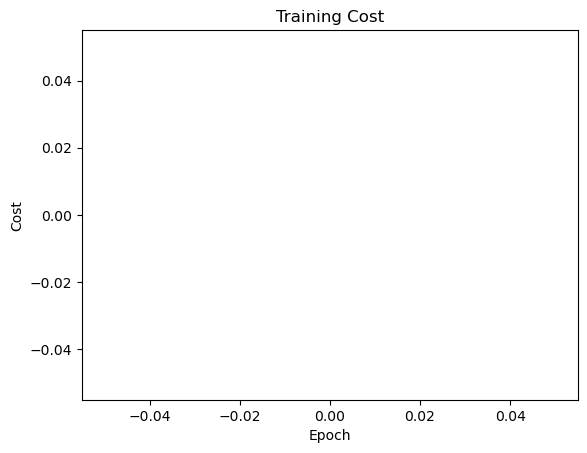

In [173]:
fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(len(losses_s))], losses_s, 'red')
plt.show()